# Assignment 3 - Supervised Learning

## *Yujing Ke*
Netid:  *yk175*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**(a)** What is the likelihood function of the data that we will wish to maximize?


$$L(w) = P(Y\mid X) = \Pi_{i= 1} (\sigma(w^Tx_i))^{y_i}  (1-\sigma(w^Tx_{i}))^{1-y_i}$$





**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).



$$C(w) = -ln[P(Y\mid X)] = -[\Sigma_{i = 1}y_i ln(\sigma(w^Tx_i)) + (1-y_i)ln(1-\sigma(w^Tx_i))]$$

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.



We know that $\sigma'(x) = \sigma(x)(1-\sigma(x))$.

Therefore we have for each parameter $w_j$, for this question j = 0,1,2.

$\nabla w_{j} C(w)$ 

$=(y_i(1-\sigma(w^T x_i))-(1-y)\sigma(w^Tx_i))x_{i,j}$

$=(y_i - \sigma(w^T x_i))x_{i,j}$

$= [(y_i - \sigma(w^T x_i))x_{i,0},(y_i - \sigma(w^T x^{(i)}))x_{i,1},(y_i - \sigma(w^T x^{(i)}))x_{i,2}]$

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

$w = w + \eta \nabla w_{j} C(w)$
$= w + \eta (y_i - \sigma(w^T x_i))x_{i,j}$

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
data = pd.read_csv('./data/A3_Q1_data.csv')
x1 = data.x1
x2 = data.x2
y = data.y

x_1 = np.asarray(x1)
x_2 = np.asarray(x2)
x = np.asarray([x_1,x_2])


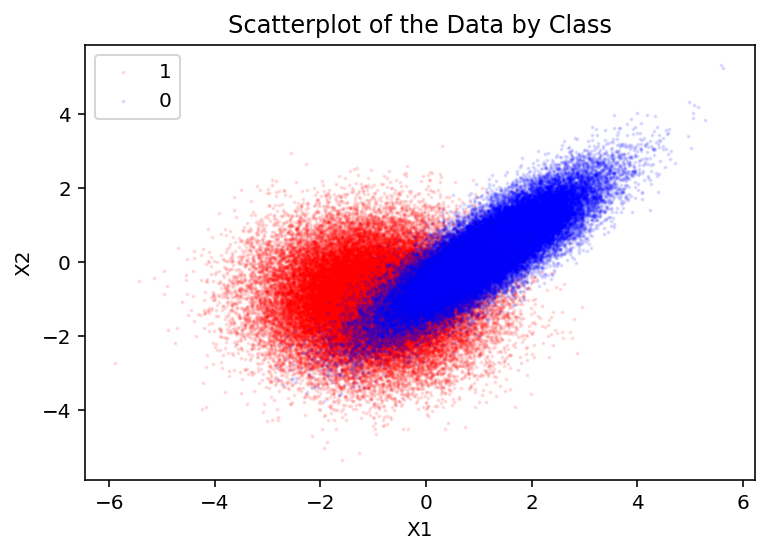

In [3]:
x1 = data.x1
x2 = data.x2
y = data.y
plt.scatter(x1[y == 1], x2[y == 1], c="r",alpha = .1,label = '1',s = 1)
plt.scatter(x1[y == 0], x2[y == 0], c="b",alpha = .1,label = '0',s = 1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Scatterplot of the Data by Class")
plt.legend()
plt.show()


If we look from a nonlinear viewpoint, data look not easy to separate. However, we can still visually see that the two catogories has their own different shape. Since this is a classification problem and linear model is not the best choice, we can adopt logistic regression would be a good choice for these data.

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

In [4]:
print(x1.isnull().sum())

0


In [5]:
print(x2.isnull().sum())

0


In [6]:
print(y.isnull().sum())

0


In [55]:
print("x1 mean is ",np.mean(x1))
print("x1 max is ",np.max(x1))
print("x1 min is ",np.min(x1))

print("x2 mean is ",np.mean(x2))
print("x2 max is ",np.max(x2))
print("x2 min is ",np.min(x2))

x1 mean is  0.04852886306129083
x1 max is  5.6344762222526965
x1 min is  -5.8864357927223985
x2 mean is  -0.39710603236220476
x2 max is  5.317718193177557
x2 min is  -5.35226469936632


The data have no missing value given the output above. Also the min value and max value seemed to be normal. To my naked eye there is no obvious error data. Therefore it seems to me that the data does not need cleaning. 

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

In [15]:
import numpy as np
def logi_regre(w,data):
    pr = []
    for i in range(len(data)):
        wx = w[0] + w[1]*data[i][0] + w[2]*data[i][1]
        pred = np.exp(wx)/(1 + np.exp(wx))
        pr.append(pred)
    return pr

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

In [16]:
def cost_fn(w,data,label):
    predict = logi_regre(w,data)
    cost = 0
    for i in range(len(data)):
        if label[i] == 1:
            cost += math.log(predict[i])
        elif label[i] == 0:
            cost += math.log(1 - predict[i])       
    return cost*(-1)        


**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?


In [51]:
# Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent.
n = len(data)
n_tr = int(0.7*n)
tr_x = x[:n_tr] #70% training data
# tr_x2 = x2[:n_tr]
tr_y = y[:n_tr]

te_x = x[n_tr:] #30% training data
# te_x2 = x2[n_tr:]
te_y = y[n_tr:]

def gradient_descent(tr_x,tr_y,w,eta,iterations):
    # w refers to weights, eta refers to the learning rate
    w_iterated = []
    g_w0 = 0
    g_w1 = 0 
    g_w2 = 0

    for i in range(iterations):
        
#         pr = logi_regre(w,tr_x)
#         print(pr)
        #gradient of the cost function with respect to model parameters
        
        for j in range(len(tr_x)):
            pr = logi_regre(w,tr_x)
            
            g_w0 += (tr_y[j] - pr[j]) 
#             print(g_w0)
            
            g_w1 += (tr_y[j] - pr[j]) * tr_x[0][j] 
#             print(g_w1)
            
            g_w1 += (tr_y[j] - pr[j]) * tr_x[1][j]  
#             print(g_w2)
            
        new_w = [w[0] + eta*g_w0, w[1] + eta*g_w0, w[2] + eta*g_w0,]
    
        w_iterated.append(new_w)
        w = new_w
#         print(w)
    return w_iterated

w = [0,0,0]
w_gradient_descent = gradient_descent(tr_x,tr_y,w,0.000001,100)
print(w_gradient_descent)

[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 



**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?



#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)

for train_index, test_index in skf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

**ANSWER**

In [97]:
#(a)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_mldata #load data from sklearn datasets so that it could be easier to handel
mnist = fetch_mldata('MNIST original')
X, y = mnist.data, mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

data = []
label = []
# for label_3 in y_train

label = np.zeros(len(y_train)) # make a 0 list
for i in range(len(label)):
    if y_train[i] == 3:
        label[i] = 1 #make it 1 if there is a 3
for i in X_train:
    data.append(i.flatten())

data = np.asarray(data)
label = np.asarray(label)

<function matplotlib.pyplot.show>

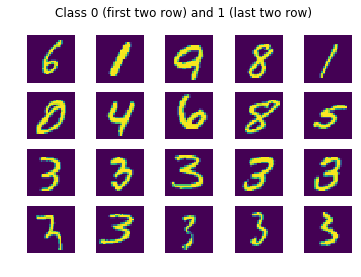

In [98]:
#(b)
import numpy as np
import matplotlib.pyplot as plt


position_0 = np.where(label== 0)[0]
position_1 = np.where(label== 1)[0]
# print(position_0)
# print(position_1)

s0 = np.arange(len(position_0))
np.random.shuffle(s0)

s1 = np.arange(len(position_1))
np.random.shuffle(s1)
shuffled_p_0 = position_0[s0]
shuffled_p_1 = position_1[s1]
# print(shuffled_p_0)

for i in range(10):
    plt.subplot(4,5,i+1)
    plt.axis("off")
    plt.imshow(np.array(data[shuffled_p_0[i]]).reshape((28,28)))

    plt.subplot(4,5,i + 11)
    plt.axis("off")
    plt.imshow(np.array(data[shuffled_p_1[i]]).reshape((28,28)))
    
plt.suptitle("Class 0 (first two row) and 1 (last two row)")
plt.show

In [64]:
# (c)
print(np.sum(label))

6131.0


(c)
From the output above we learn that out of 60000 images in training data set, only 6131 of them are in class 1 while 53869 data points are of class 0. The classes are imbalanced. This might cause the model to be more likely to classify a data to class 0.

(d) 
Using cross-validation, train and test a classifier. 

In [ ]:
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import sklearn.dummy as dmy
from sklearn import svm

X = data
y = label
area_uc = []
skf = StratifiedKFold(n_splits=4)

def accuracy(predicted,actual):
    ct = 0
    for i in range(len(predicted)):
        if predicted[i] == actual[i]:
            ct +=1
    return ct/float(len(actual))
i = 0        
for train_index, test_index in skf.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    
    clf = svm.SVC()
    clf.fit(X_train, y_train) 
    pred = clf.predict(X_test)
    print(accuracy(pred,y_test))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
    area_uc.append(metrics.roc_auc_score(y_test, pred))
    plt.plot(fpr, tpr,label = "ROC %d fold AUC = %0.3f" %(i,area_uc[i]))
    i = i + 1
    
# Dummy classifier 
clf1 = dmy.DummyClassifier(strategy='uniform')
# DummyClassifier is a classifier that makes predictions using simple rules.
# 'uniform' generates predictions uniformly at random.
clf1.fit(X_train,y_train)
pred = clf1.predict(X_test)
fpr_clf1, tpr_clf1, thresholds_clf1 = metrics.roc_curve(y_test, pred)
auc_clf1 = metrics.auc(fpr_clf1,tpr_clf1)
plt.plot(fpr_clf1, tpr_clf1,label="ROC Classifier Guess 0 AUC = %0.3f"%auc_clf1)
print(accuracy(pred,y))

    
# Always guess 0 classifier
fpr_clf2, tpr_clf2, thresholds_clf2 = metrics.roc_curve(y, np.zeros(len(y)))
auc_clf2 = metrics.auc(fpr_clf2,tpr_clf2)
plt.plot(fpr_clf2, tpr_clf2,label="ROC Classifier Guess 0 AUC = %0.3f"%auc_clf2)
print(accuracy(np.zeros(len(y)),y))
   
# plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Classifier 1 & 2')
plt.legend()
plt.show

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

If we only look at the plot, the two different classifiers are not very different from each other. 

However, if we compare the accuracy rate, we can see a big difference. The classifier 1 has about 0.5 accuracy in every fold, however the always guess 0 classifier has almost 0.9 accuracy.

I think this is because number "3" takes about 10% of the data set, therefore, if we always guess 0, we can still get about 90% correct all the time.

(f) Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the LogisticRegression module and activating the 'l1' penalty; the parameter  C
  is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3)  F1
 -score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

In [ ]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

# C: Inverse of regularization strength; must be a positive float. 
# Like in support vector machines, smaller values specify stronger regularization.
X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(penalty='l1',C=1e5)
clf.fit(X, y)



## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**a**

I am interested in investigating how the wine quality is influenced by different factors, including fixed acidity,	volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol rate. And I want to know which are the most significant factors. 


In [131]:
### b 
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep =";" )
data_arr = np.asarray(data)
df = pd.DataFrame(data=data)

from sklearn import preprocessing
import numpy as np
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data_arr)


<function matplotlib.pyplot.show>

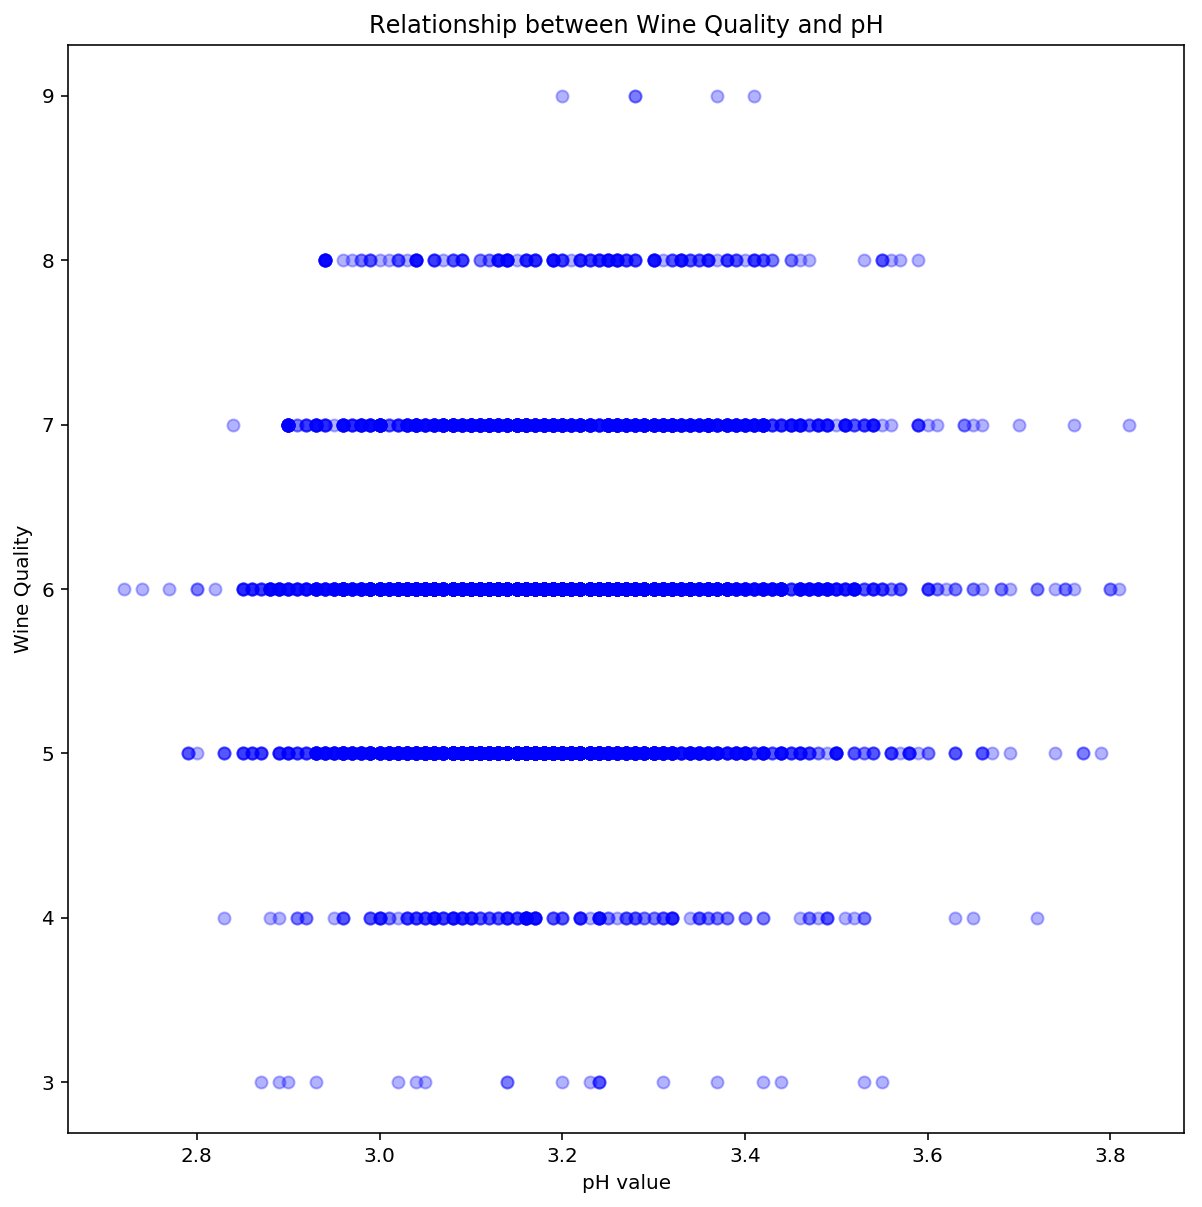

In [133]:
import numpy as np
import matplotlib.pyplot as plt

ph = np.asarray(data.pH)
quality = np.asarray(data.quality)
plt.scatter( ph,quality, c="b",alpha =.3)
plt.title("Relationship between Wine Quality and pH")
plt.ylabel('Wine Quality')
plt.xlabel('pH value')
plt.figure(figsize=(20,20))
plt.show

<function matplotlib.pyplot.show>

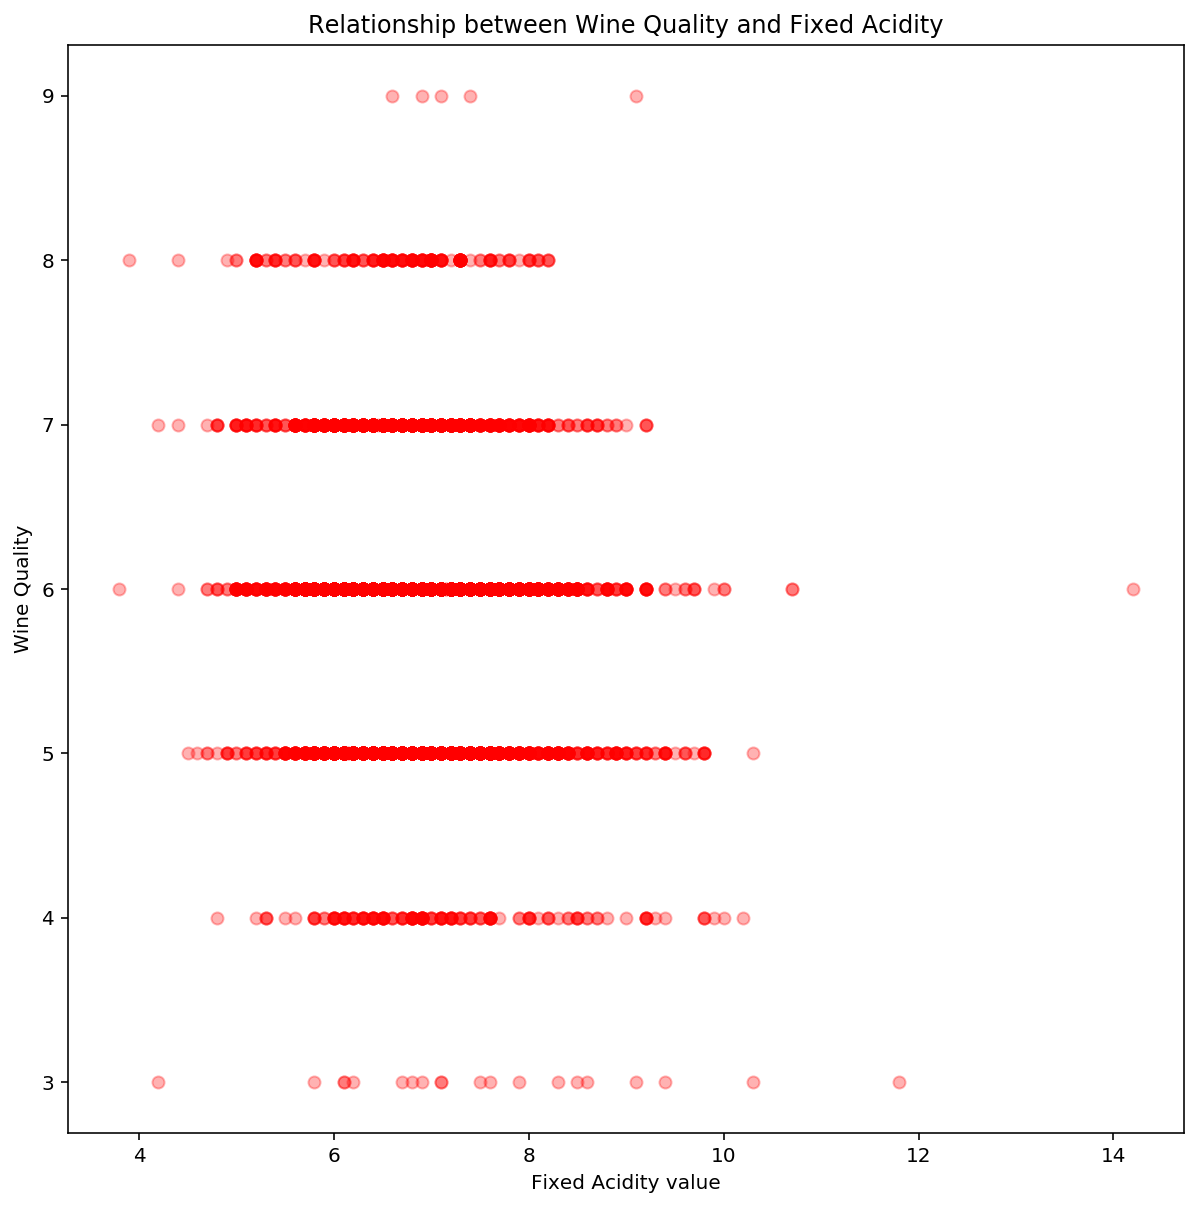

In [132]:
fa = np.asarray(data_arr[:,0])
plt.scatter(fa, quality, c="r",alpha =.3)
plt.title("Relationship between Wine Quality and Fixed Acidity")
plt.ylabel('Wine Quality')
plt.xlabel('Fixed Acidity value')
plt.figure(figsize=(20,20))
plt.show

<function matplotlib.pyplot.show>

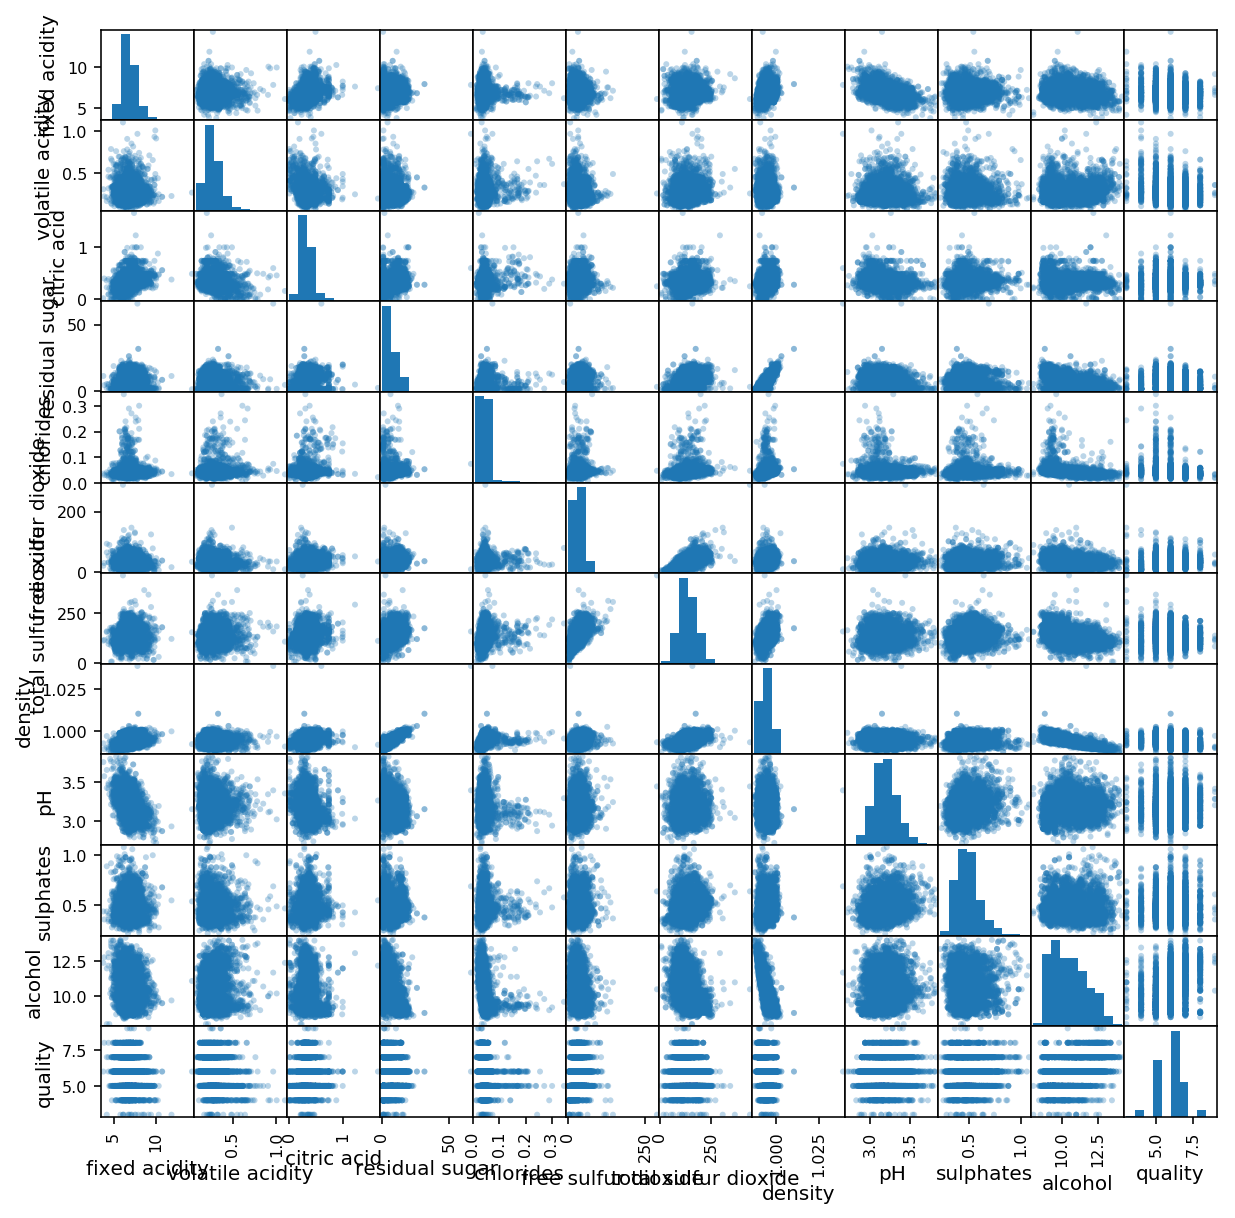

In [103]:
pd.plotting.scatter_matrix(df, alpha = 0.3)
plt.figure(figsize=(30,30))
plt.show


The matrix plot is a broader view of the relationship between features.

**c**

My target variable is "wine quality" and the predictors I have are "fixed acidity,	volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol rate". By the output below I can see that there is no missing data. I normalized data as the box plot shown.

In [136]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<function matplotlib.pyplot.show>

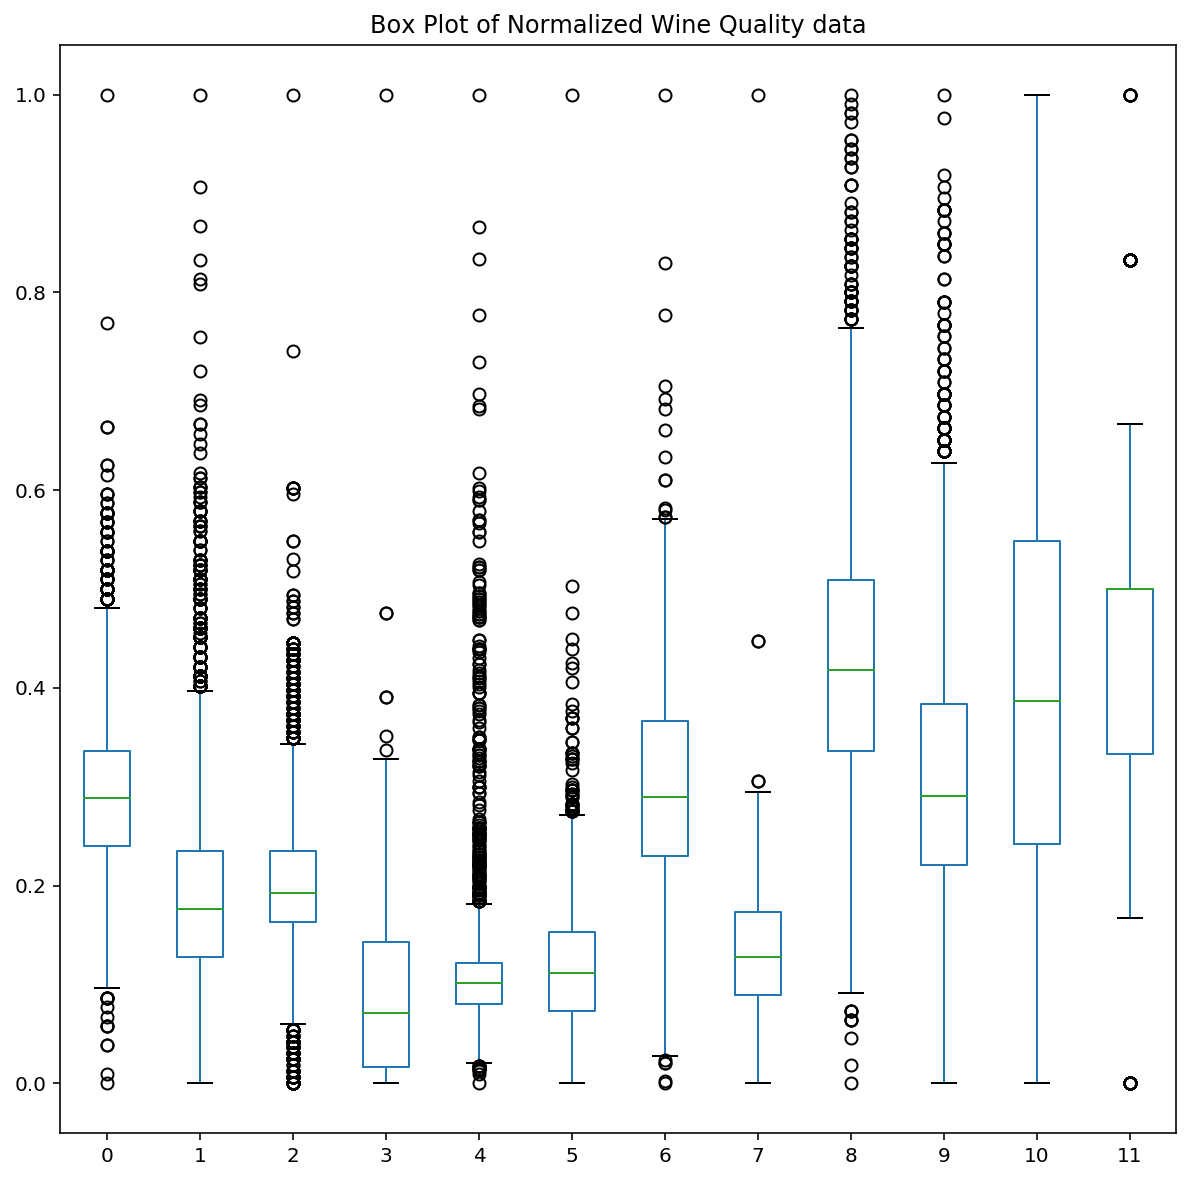

In [134]:
nd = pd.DataFrame(normalized_data)
nd.plot.box()
plt.title("Box Plot of Normalized Wine Quality data")
plt.figure(figsize=(30,30))

plt.show

**d**

I will use linear regression and knn to compare which one is better, because linear regression is better when my data relationship is highly linear, while knn is better when it is not highly linear.

In [165]:
y = normalized_data[:,11]
X = normalized_data[:,0:1]
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# Make predictions
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

Coefficients: 
 [-0.20676758]
Mean squared error: 0.02
Variance score: 0.01


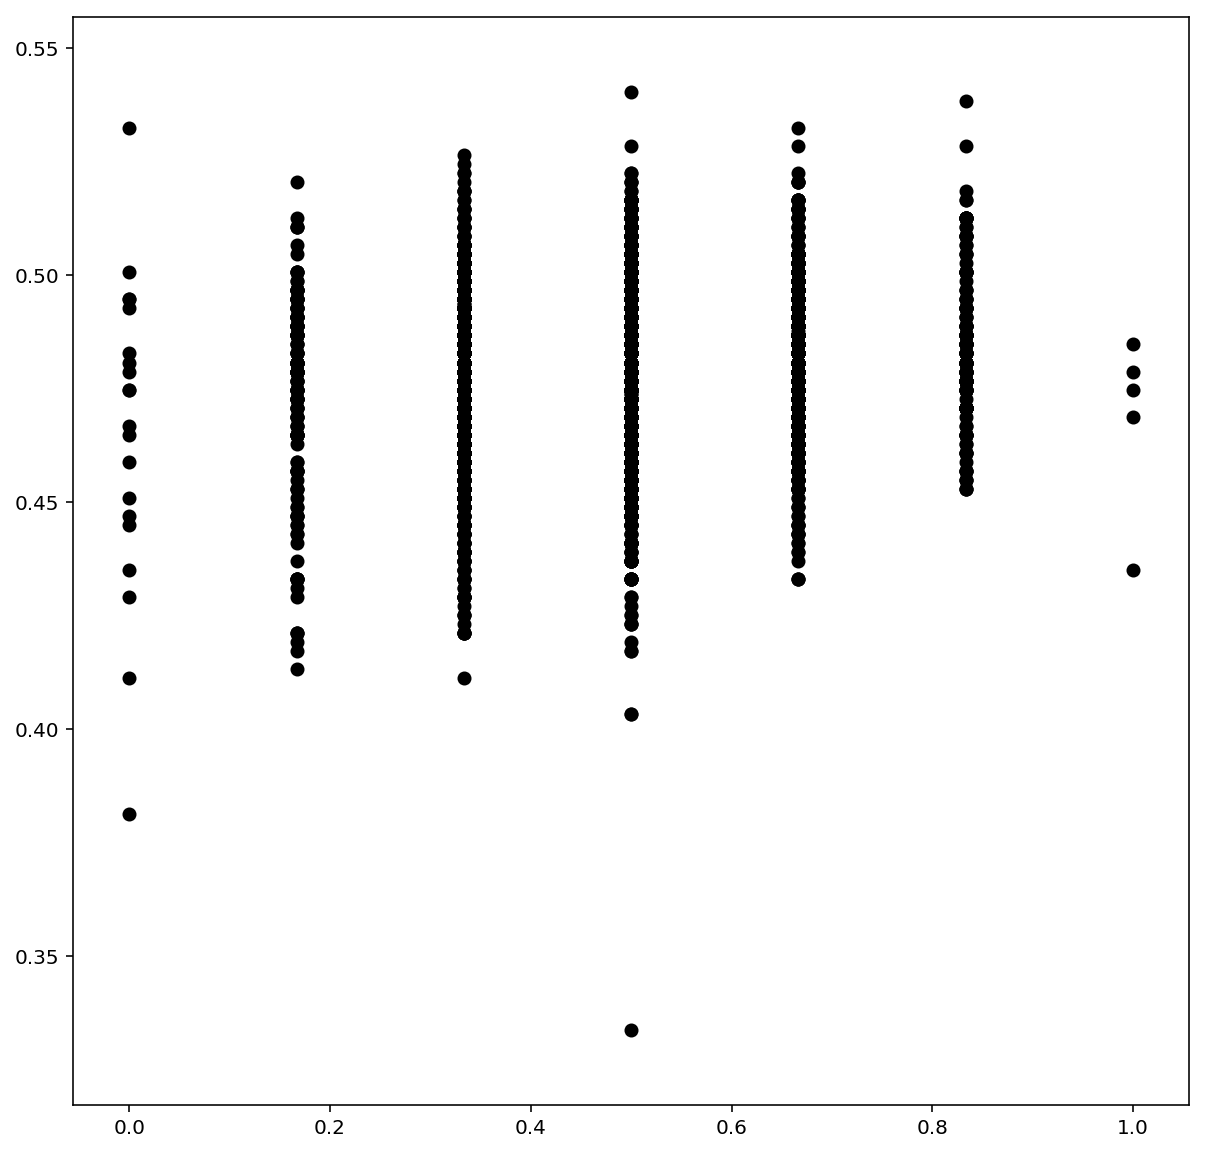

In [166]:
plt.scatter(y, y_pred,  color='black')

In [162]:
y_pred

array([0.42574633, 0.37340408, 0.48627825, ..., 0.39578713, 0.60165825,
       0.5850371 ])